In [1]:
import numpy as np
import scipy.io
import sys
sys.path.append('/media/ackmanadmin/BrianMullen/AuditoryStimGeneration/')
# import stimgen
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Stimulation file


In [2]:
stimpath = '/home/feldheimlab/Documents/AuditoryStimGeneration/cfos_behavior_stim_threechannel.wav'
rate, data = wavfile.read(stimpath)
print(data.shape)

N = int(rate/2)
T = 1.0 / rate
x = np.linspace(0.0, N*T, N, endpoint=False)
time = x/rate

(10050000, 3)


## Wavelet Analysis

<Figure size 360x360 with 0 Axes>

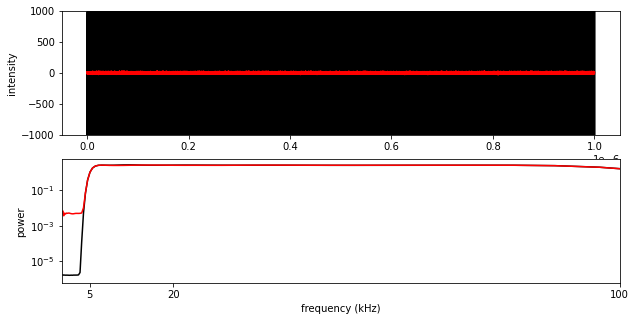

In [3]:
import sys
sys.path.append('/home/feldheimlab/Documents/pyWholeBrain/')
from waveletAnalysis import waveletAnalysis as wave

fig = plt.figure(figsize=(5,5))

fig, axs = plt.subplots(2,1,figsize=(10,5))

axs[0].plot(time[:int(rate/2)], data[:int(rate/2)], color='black')
axs[0].plot(time[:int(rate/2)], data[-int(rate/2):], color='red')
axs[0].set_ylim(-1000,1000)

tal

axs[1].plot(w.flambda/1000, w.gws, color='black', alpha=1)
axs[1].plot(w2.flambda/1000, w2.gws, color='red', alpha=1)

axs[1].set_xticks([5,20,100])
axs[1].set_xlim(0,100)
# axs[1].set_ylim(10**-1,10**7)
axs[1].set_yscale('log')
    
axs[0].set_ylabel('intensity')
axs[1].set_ylabel('power')
axs[1].set_xlabel('frequency (kHz)')
plt.show()

## FFT

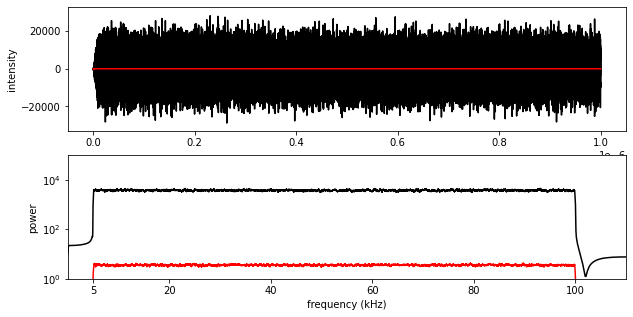

In [4]:
from scipy.fft import fft, fftfreq

import numpy as np

# Number of sample points
N = int(rate/2)
# sample spacing

T = 1.0 / 500000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
time = x/rate
fig, axs = plt.subplots(2,1,figsize=(10,5))

yf = fft(data[:N, 0])
xf = fftfreq(N, T)[:N//2]/1000
yfnoise = fft(data[-N:, 0])
xfnoise = fftfreq(N, T)[:N//2]/1000

axs[0].plot(time[:N], data[:N, 0], color='black')
axs[0].plot(time[:N], data[-N:, 0], color='red')
axs[0].set_ylim(-2**16/2,2**16/2)

smoothy = np.convolve(2.0/N * np.abs(yf[0:N//2]), np.ones(100), mode='same')
smoothynoise = np.convolve(2.0/N * np.abs(yfnoise[0:N//2]), np.ones(100), mode='same')

axs[1].plot(xfnoise, smoothynoise, color='red', alpha=1)
axs[1].plot(xf,smoothy, color='black', alpha=1)

axs[1].set_xticks([5,20,40,60,80,100])
axs[1].set_xlim(0,110)
axs[1].set_ylim(10**0,10**5)
axs[1].set_yscale('log')
    
axs[0].set_ylabel('intensity')
axs[1].set_ylabel('power')
axs[1].set_xlabel('frequency (kHz)')
plt.show()


# TDT speakers

In [5]:
wddir = '/media/feldheimlab/DEF5-D28F/0degree-TDT-TDT-5/'

(hrate1, hdata1) = wavfile.read(wddir + 'TDT-TDTspeaker1.wav')
(hrate2, hdata2) = wavfile.read(wddir + 'TDT-TDTspeaker2.wav')
(hrate3, hdata3) = wavfile.read(wddir + 'TDT-TDTspeaker3.wav')

wddir = '/media/feldheimlab/DEF5-D28F/0degree-TDT-TDT-1/'

(mrate1, mdata1) = wavfile.read(wddir + 'TDT-TDTspeaker1.wav')
(mrate2, mdata2) = wavfile.read(wddir + 'TDT-TDTspeaker2.wav')
(mrate3, mdata3) = wavfile.read(wddir + 'TDT-TDTspeaker3.wav')

datas = [hdata1,hdata2,hdata3,mdata1,mdata2,mdata3]
rates = [hrate1,hrate2,hrate3,mrate1,mrate2,mrate3]

# for d, data in enumerate(datas):
#     rate = rates[d]
#     time = np.arange(0,data.shape[0]/rate,rate**-1)
#     time = time[:data.shape[0]]

#     fig, axs = plt.subplots(1,1)
#     axs.plot(time, data)
#     axs.set_ylabel('amplitude')
#     axs.set_xlabel('time(s)')
#     axs.set_ylim(-1000,1000)
#     plt.show()

## Wavelet analysis

<Figure size 360x360 with 0 Axes>

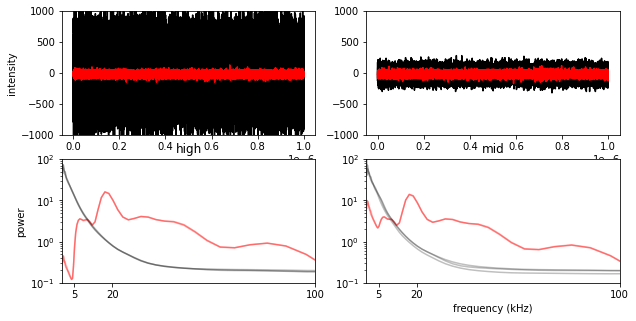

In [6]:
import sys
samprate = hrate1
sys.path.append('/home/feldheimlab/Documents/pyWholeBrain/')
from waveletAnalysis import waveletAnalysis as wave

fig = plt.figure(figsize=(5,5))

labels = ['high', 'mid', 'low']
fig, axs = plt.subplots(2,2,figsize=(10,5))
a = -1
for d, data in enumerate(datas):
    if d % 3 == 0:
        a += 1
        axs[0][a].plot(time[:int(rates[d]/2)], data[:int(rates[d]/2)], color='black')
        axs[0][a].plot(time[:int(rates[d]/2)], data[-int(rates[d]/2):], color='red')
        axs[0][a].set_ylim(-1000,1000)
    
    w = wave(data[:int(rates[d]/2)], fps=rates[d], param=6)
    w.globalWaveletSpectrum()

    w2 = wave(data[-int(rates[d]/2):], fps=rates[d], param=6)
    w2.globalWaveletSpectrum()

    axs[1][a].plot(w.flambda/1000, w.gws, color='red', alpha=0.25)
    axs[1][a].plot(w2.flambda/1000, w2.gws, color='black', alpha=0.25)
    
    axs[1][a].set_xticks([5,20,100])
    axs[1][a].set_xlim(0,100)
    axs[1][a].set_ylim(10**-1,10**2)
    axs[1][a].set_yscale('log')
    axs[1][a].title.set_text(labels[a])
    
axs[0][0].set_ylabel('intensity')
axs[1][0].set_ylabel('power')
axs[1][1].set_xlabel('frequency (kHz)')
plt.show()

## FFT

<Figure size 360x360 with 0 Axes>

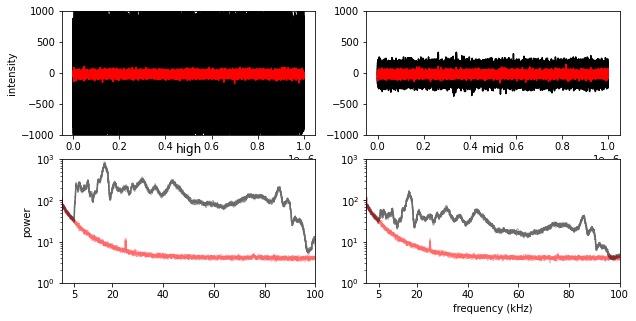

In [7]:
from scipy.fft import fft, fftfreq

import numpy as np


# Number of sample points
N = int(rates[0]/2)
# sample spacing

T = 1.0 / 500000.0
x = np.linspace(0.0, N*T, N, endpoint=False)


fig = plt.figure(figsize=(5,5))

labels = ['high', 'mid', 'low']
fig, axs = plt.subplots(2,2,figsize=(10,5))
a = -1
for d, data in enumerate(datas):
    if d % 3 == 0:
        a += 1
        
    yf = fft(data[:N])
    xf = fftfreq(N, T)[:N//2]/1000
    yfnoise = fft(data[-N:])
    xfnoise = fftfreq(N, T)[:N//2]/1000
                  
    axs[0][a].plot(time[:N], data[:N], color='black')
    axs[0][a].plot(time[:N], data[-N:], color='red')
    axs[0][a].set_ylim(-1000,1000)

    smoothy = np.convolve(2.0/N * np.abs(yf[0:N//2]), np.ones(100), mode='same')
    smoothynoise = np.convolve(2.0/N * np.abs(yfnoise[0:N//2]), np.ones(100), mode='same')

    axs[1][a].plot(xfnoise, smoothynoise, color='red', alpha=0.25)
    axs[1][a].plot(xf,smoothy, color='black', alpha=0.25)

    axs[1][a].set_xticks([5,20,40,60,80,100])
    axs[1][a].set_xlim(0,100)
    axs[1][a].set_ylim(10**0,10**3)
    axs[1][a].set_yscale('log')
    axs[1][a].title.set_text(labels[a])
    
axs[0][0].set_ylabel('intensity')
axs[1][0].set_ylabel('power')
axs[1][1].set_xlabel('frequency (kHz)')
plt.show()



# Cell phone speakers

In [8]:
wddir = '/media/feldheimlab/DEF5-D28F/0degree-TDT-high/'

(hrate1, hdata1) = wavfile.read(wddir + 'TDT-CPspeaker1.wav')
(hrate2, hdata2) = wavfile.read(wddir + 'TDT-CPspeaker2.wav')
(hrate3, hdata3) = wavfile.read(wddir + 'TDT-CPspeaker3.wav')

wddir = '/media/feldheimlab/DEF5-D28F/0degree-TDT-mid/'

(mrate1, mdata1) = wavfile.read(wddir + 'TDT-CPspeaker1.wav')
(mrate2, mdata2) = wavfile.read(wddir + 'TDT-CPspeaker2.wav')
(mrate3, mdata3) = wavfile.read(wddir + 'TDT-CPspeaker3.wav')

wddir = '/media/feldheimlab/DEF5-D28F/0degree-TDT-superlow/'

(srate1, sdata1) = wavfile.read(wddir + 'TDT-CPspeaker1.wav')
(srate2, sdata2) = wavfile.read(wddir + 'TDT-CPspeaker2.wav')
(srate3, sdata3) = wavfile.read(wddir + 'TDT-CPspeaker3.wav')

datas = [hdata1,hdata2,hdata3,mdata1,mdata2,mdata3,sdata1,sdata2,sdata3]
rates = [hrate1,hrate2,hrate3,mrate1,mrate2,mrate3,srate1,srate2,srate3]

# for d, data in enumerate(datas):
#     rate = rates[d]
#     time = np.arange(0,data.shape[0]/rate,rate**-1)
#     time = time[:data.shape[0]]

#     fig, axs = plt.subplots(1,1)
#     axs.plot(time, data)
#     axs.set_ylabel('amplitude')
#     axs.set_xlabel('time(s)')
#     axs.set_ylim(-1000,1000)
#     plt.show()

## Wavelet analysis

<Figure size 360x360 with 0 Axes>

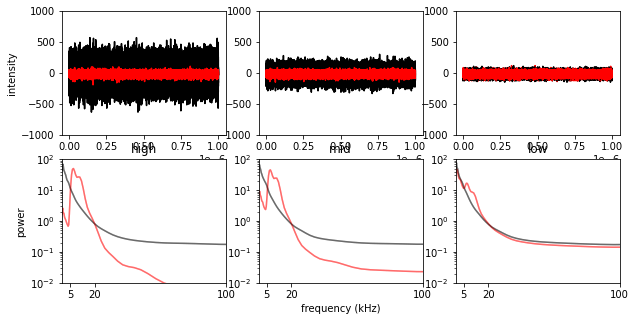

In [9]:
import sys
samprate = hrate1
sys.path.append('/home/feldheimlab/Documents/pyWholeBrain/')
from waveletAnalysis import waveletAnalysis as wave

fig = plt.figure(figsize=(5,5))

labels = ['high', 'mid', 'low']
fig, axs = plt.subplots(2,3,figsize=(10,5))
a = -1
for d, data in enumerate(datas):
    if d % 3 == 0:
        a += 1
        w = wave(data[:int(rates[d]/2)], fps=rates[d], param=6)
        w.globalWaveletSpectrum()

        w2 = wave(data[-int(rates[d]/2):], fps=rates[d], param=6)
        w2.globalWaveletSpectrum()

    axs[0][a].plot(time[:int(rates[d]/2)], data[:int(rates[d]/2)], color='black')
    axs[0][a].plot(time[:int(rates[d]/2)], data[-int(rates[d]/2):], color='red')
    axs[0][a].set_ylim(-1000,1000)

    axs[1][a].plot(w.flambda/1000, w.gws, color='red', alpha=0.25)
    axs[1][a].plot(w2.flambda/1000, w2.gws, color='black', alpha=0.25)
    
    axs[1][a].set_xticks([5,20,100])
    axs[1][a].set_xlim(0,100)
    axs[1][a].set_ylim(10**-2,10**2)
    axs[1][a].set_yscale('log')
    axs[1][a].title.set_text(labels[a])
    
axs[0][0].set_ylabel('intensity')
axs[1][0].set_ylabel('power')
axs[1][1].set_xlabel('frequency (kHz)')
plt.show()

## FFT

<Figure size 360x360 with 0 Axes>

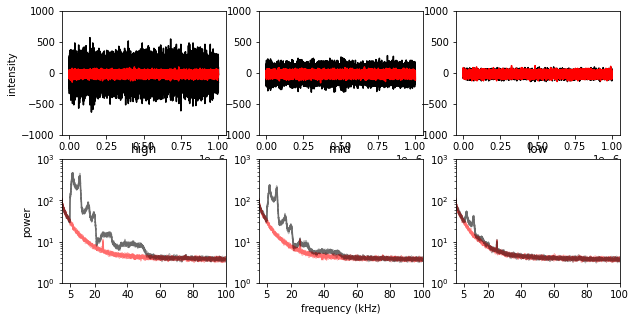

In [10]:
from scipy.fft import fft, fftfreq

import numpy as np


# Number of sample points
N = int(rates[d]/2)
# sample spacing

T = 1.0 / 500000.0
x = np.linspace(0.0, N*T, N, endpoint=False)


fig = plt.figure(figsize=(5,5))

labels = ['high', 'mid', 'low']
fig, axs = plt.subplots(2,3,figsize=(10,5))
a = -1
for d, data in enumerate(datas):
    if d % 3 == 0:
        a += 1
        axs[0][a].plot(time[:N], data[:N], color='black')
        axs[0][a].plot(time[:N], data[-N:], color='red')
        axs[0][a].set_ylim(-1000,1000)
    yf = fft(data[:N])
    xf = fftfreq(N, T)[:N//2]/1000
    yfnoise = fft(data[-N:])
    xfnoise = fftfreq(N, T)[:N//2]/1000
                  
    smoothy = np.convolve(2.0/N * np.abs(yf[0:N//2]), np.ones(100), mode='same')
    smoothynoise = np.convolve(2.0/N * np.abs(yfnoise[0:N//2]), np.ones(100), mode='same')

    axs[1][a].plot(xfnoise, smoothynoise, color='red', alpha=0.25)
    axs[1][a].plot(xf,smoothy, color='black', alpha=0.25)

    axs[1][a].set_xticks([5,20,40,60,80,100])
    axs[1][a].set_xlim(0,100)
    axs[1][a].set_ylim(10**0,10**3)
    axs[1][a].set_yscale('log')
    axs[1][a].title.set_text(labels[a])
    
axs[0][0].set_ylabel('intensity')
axs[1][0].set_ylabel('power')
axs[1][1].set_xlabel('frequency (kHz)')
plt.show()



## Spectrograms

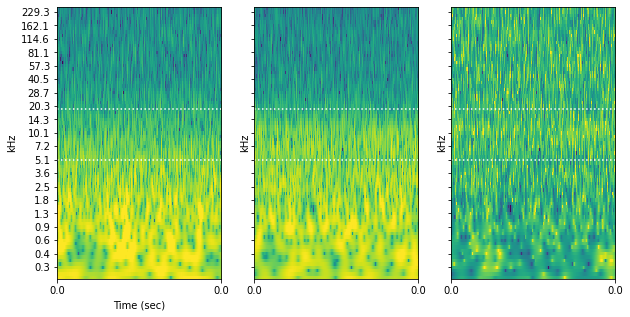

In [12]:
import sys
samprate = hrate1
sys.path.append('/home/feldheimlab/Documents/pyWholeBrain/')
from waveletAnalysis import waveletAnalysis as wave

fig, axs = plt.subplots(1,3,sharey=True, figsize=(10,5))

# w = wave(hdata3[:hrate1], fps=samprate, param=6)
# w.globalWaveletSpectrum()
# w2 = wave(hdata3[-hrate1:], fps=samprate, param=6)
# w2.globalWavletSpectrum()

vmin = -10
vmax = 5

axs[0].imshow(np.log(w2.power), aspect='auto', vmin=vmin, vmax=vmax, interpolation='nearest')
axs[0].hlines([45, 30],0,rate, color='white',linestyles=':')
axs[0].set_yticks(np.arange(w.flambda.shape[0])[1::4], np.round(w.flambda[1::4]/1000,1))
axs[0].set_xticks(np.arange(time.shape[0])[::50000], np.round(time,2)[::50000])
axs[0].set_xlim(0*rate,0*rate+50000)
axs[0].set_ylabel('kHz')
axs[0].set_xlabel('Time (sec)')

axs[1].imshow(np.log(w.power), aspect='auto',  vmin=vmin, vmax=vmax, interpolation='nearest')
axs[1].hlines([45, 30],0,rate, color='white',linestyles=':')
axs[1].set_yticks(np.arange(w.flambda.shape[0])[1::4], np.round(w.flambda[1::4]/1000,1))
axs[1].set_xticks(np.arange(time.shape[0])[::50000], np.round(time,2)[::50000])
axs[1].set_xlim(0*rate,0*rate+50000)
axs[1].set_ylabel('kHz')

axs[2].imshow(np.log(w.power) - np.log(w2.power), aspect='auto', vmin=vmin, vmax=vmax, interpolation='nearest')
axs[2].hlines([45, 30],0,rate, color='white',linestyles=':')
axs[2].set_yticks(np.arange(w.flambda.shape[0])[1::4], np.round(w.flambda[1::4]/1000,1))
axs[2].set_xticks(np.arange(time.shape[0])[::50000], np.round(time,2)[::50000])
axs[2].set_xlim(0*rate,0*rate+50000)
axs[2].set_ylabel('kHz')

plt.show()